# Breast Cancer Detection

## Goal

Help doctors diagnose breast cancer. For given data about a biopsied breast cell, to predict if it is benign (not harmful) or malignant (cancerous).

## Findings

* Data is relatively balanced, no need for oversampling or undersampling.
* The two features, Uniformity of Cell Shape and Bare Nuclei, seem to have clear margin of the two classed/more important than other feature.
* Random forest model works good in this case, with a 0.97 f1 score.

## Summary/Suggestions

There is a non-zero cost in time and money to collect each feature about a given cell. How would you go about determining the most cost-effective method of detecting malignancy?
* I would choose 6 top important features of all 9 features. In that case, I will not lose the accuracy a lot.

### Data Analysis
removing useless data and 
checking missing values

In [166]:
#import the packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [117]:
# import the orginal data
file = pd.read_csv('Copy of breast-cancer-wisconsin.txt', sep = ',')

In [118]:
file.head()

,Index,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0,1241035,7,8,3,7,4,5,7,8,2,4
1,1,1107684,6,10,5,5,4,10,6,10,1,4
2,2,691628,8,6,4,10,10,1,3,5,1,4
3,3,1226612,7,5,6,3,3,8,7,4,1,4
4,4,1142706,5,10,10,10,6,10,6,5,2,4


In [119]:
# remove if there are duplicated values
file = file.drop_duplicates(subset='ID')
file.count()

Index                          666
ID                             666
Clump Thickness                666
Uniformity of Cell Size        666
Uniformity of Cell Shape       666
Marginal Adhesion              666
Single Epithelial Cell Size    666
Bare Nuclei                    666
Bland Chromatin                666
Normal Nucleoli                666
Mitoses                        666
Class                          666
dtype: int64

In [147]:
col = file.columns
col

Index(['Index', 'ID', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [149]:
file['Class'].unique() #2 for benign, 4 for malignant

array(['4', '2', '40', '20', '?'], dtype=object)

In [150]:
# remove useless data
m_file = file[file.Class == '4'] 
b_file = file[file.Class == '2']
new_file = pd.concat([m_file,b_file], ignore_index=True)
new_file = new_file.sample(frac = 1)
print(new_file['Class'].unique())
new_file.count()

['2' '4']


Index                          643
ID                             643
Clump Thickness                643
Uniformity of Cell Size        643
Uniformity of Cell Shape       643
Marginal Adhesion              643
Single Epithelial Cell Size    643
Bare Nuclei                    643
Bland Chromatin                643
Normal Nucleoli                643
Mitoses                        643
Class                          643
dtype: int64

In [152]:
new_file.dtypes

Index                           int64
ID                              int64
Clump Thickness                 int64
Uniformity of Cell Size        object
Uniformity of Cell Shape       object
Marginal Adhesion              object
Single Epithelial Cell Size    object
Bare Nuclei                    object
Bland Chromatin                object
Normal Nucleoli                object
Mitoses                        object
Class                          object
dtype: object

In [153]:
# changing data type/ to all numerical
for col_name in col:
    new_file[col_name] = pd.to_numeric(new_file[col_name], errors='coerce')

In [154]:
new_file.dtypes

Index                            int64
ID                               int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [155]:
# checking null 
new_file.isnull().sum()

Index                           0
ID                              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [159]:
# dropping all null
new_file = new_file.dropna()
new_file.count()

Index                          627
ID                             627
Clump Thickness                627
Uniformity of Cell Size        627
Uniformity of Cell Shape       627
Marginal Adhesion              627
Single Epithelial Cell Size    627
Bare Nuclei                    627
Bland Chromatin                627
Normal Nucleoli                627
Mitoses                        627
Class                          627
dtype: int64

In [160]:
# seperate features(x) and target(y)
y = new_file.Class
drop_list = ['Index', 'ID', 'Class']
x = new_file.drop(drop_list, axis = 1)
x.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
516,1,1,1,2,2,1.0,2,1,1
14,8,6,5,4,3,10.0,6,1,1
519,4,1,2,1,2,1.0,2,1,1
401,1,1,1,1,1,1.0,1,1,1
223,7,5,6,10,4,10.0,5,3,1


2    395
4    232
Name: Class, dtype: int64

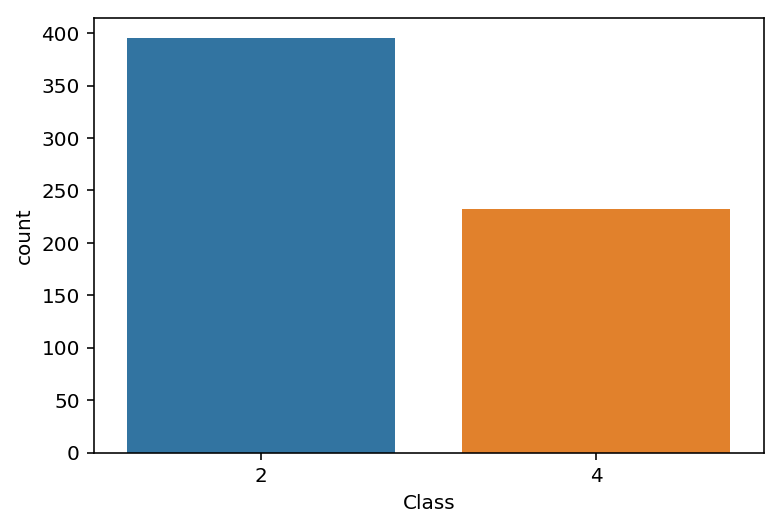

In [163]:
sns.countplot(y, label = 'Count') 
y.value_counts() #2 for benign, 4 for malignant

### Visualization

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

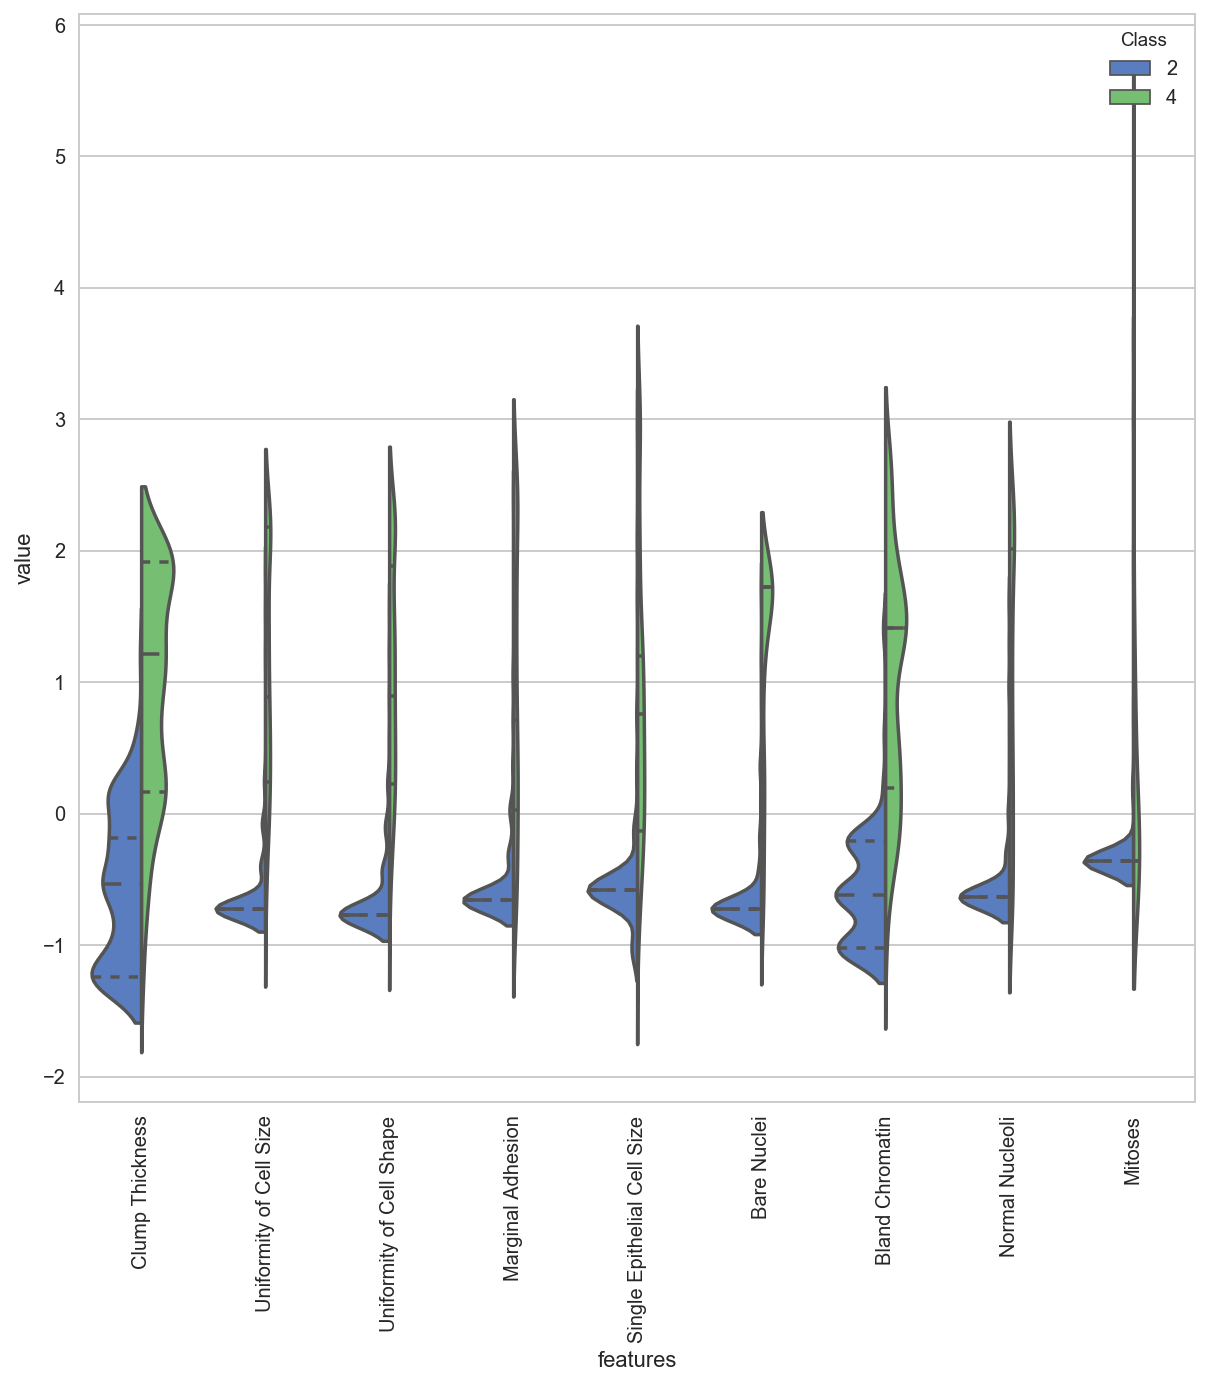

In [185]:
# features visualization
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2],axis=1)
data = pd.melt(data,id_vars="Class",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Class", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

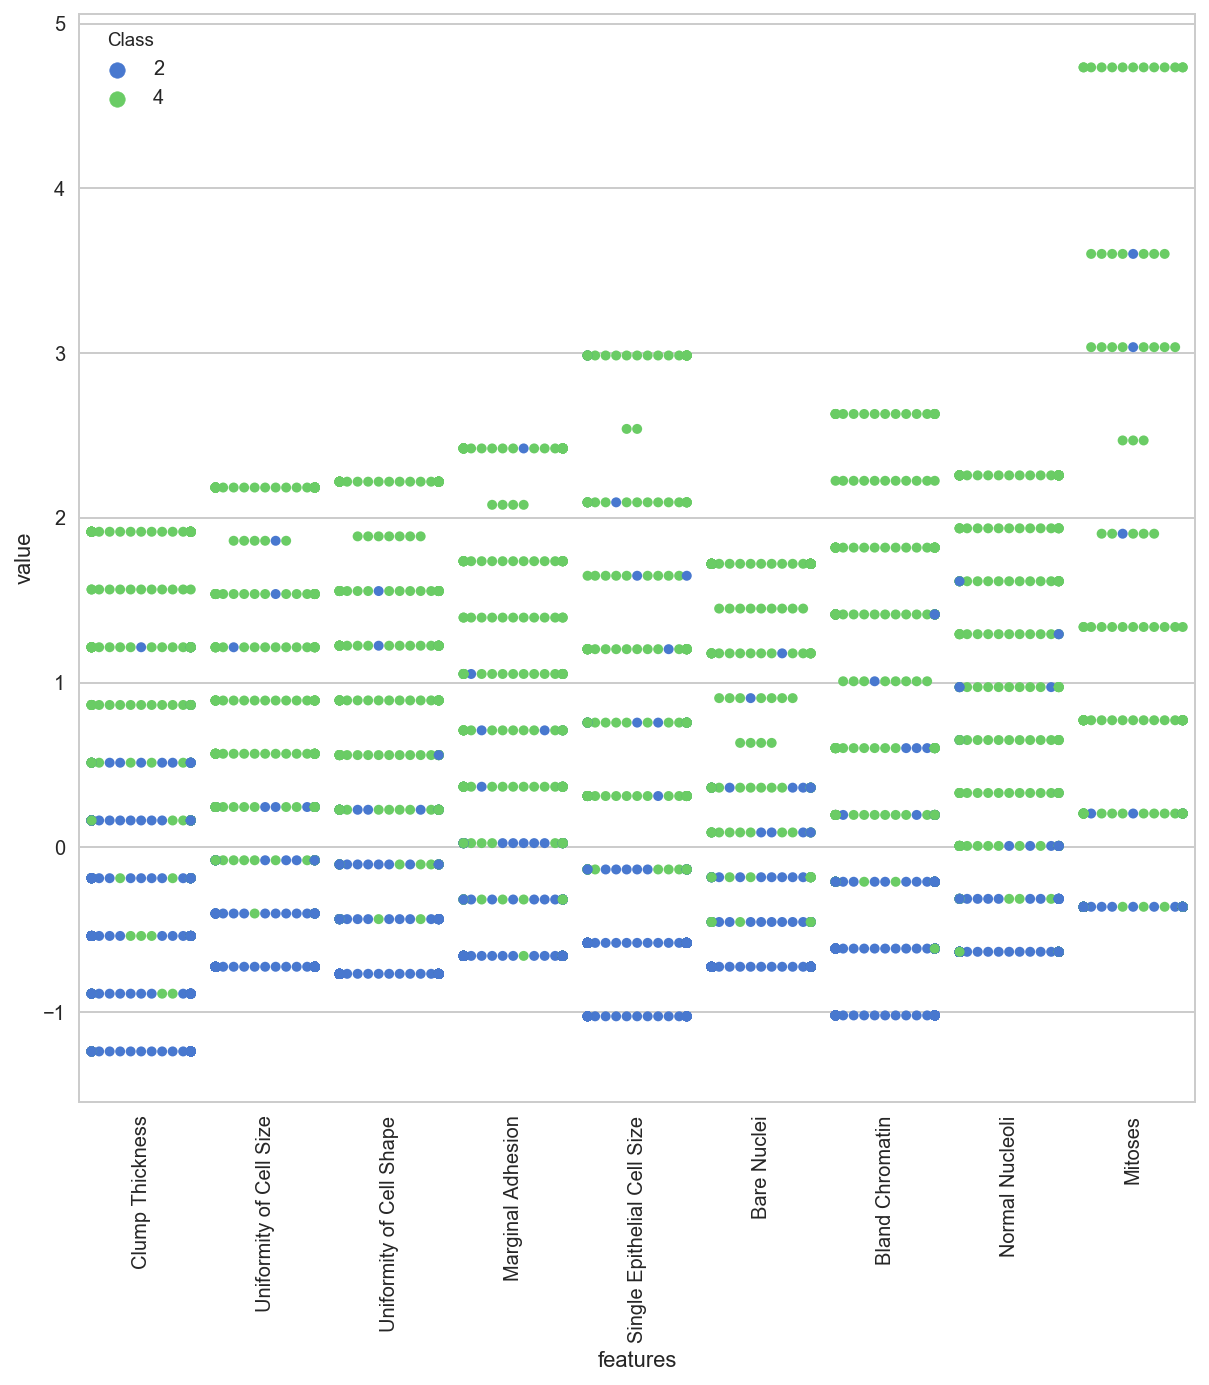

In [193]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="Class", data=data)
#plt.ylim(-1,3)
plt.xticks(rotation=90)

### Feature Correlation

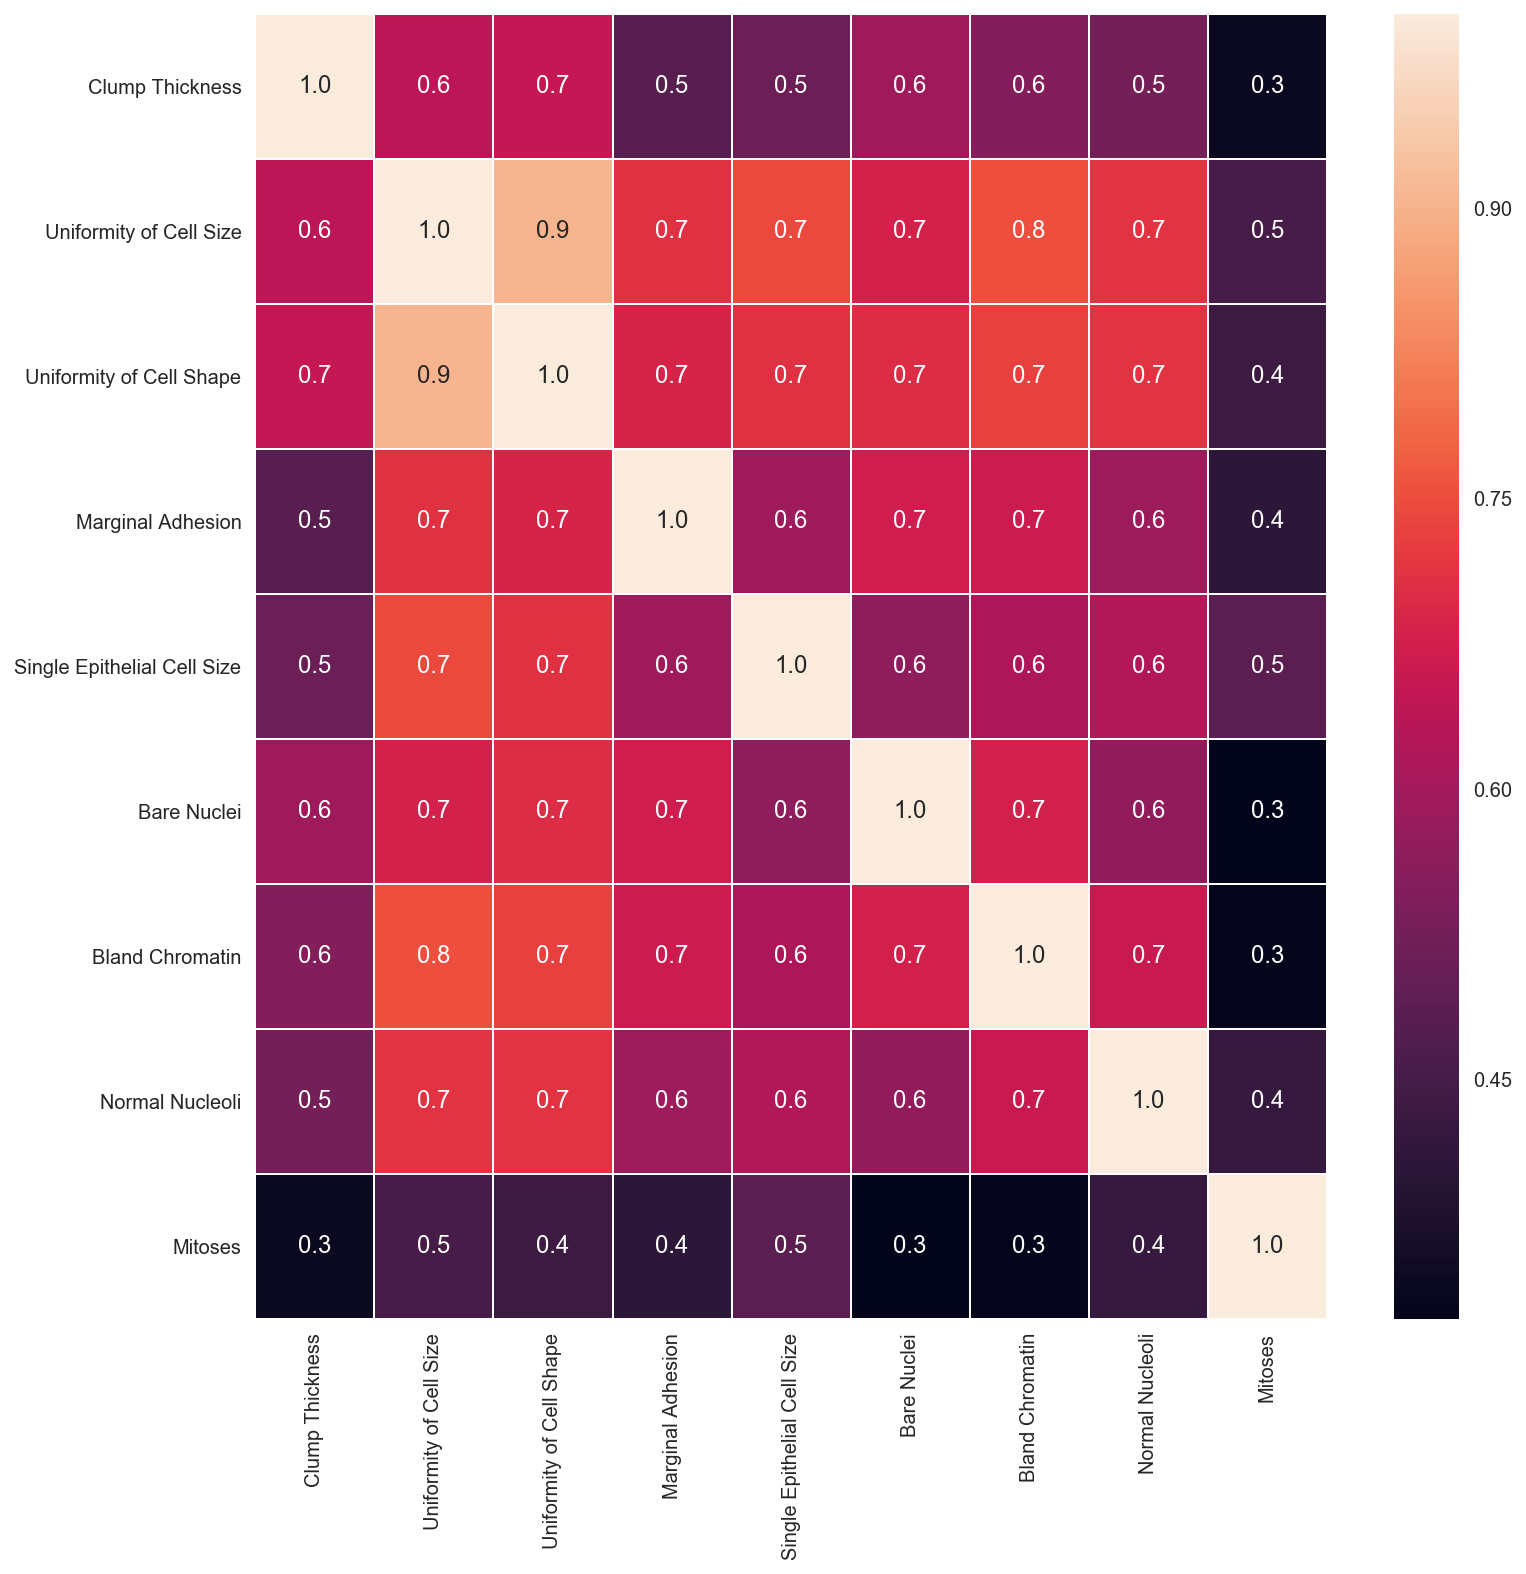

In [201]:
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)

### Feature Selection and Random Forest Classification

In [194]:
col

Index(['Index', 'ID', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [260]:
drop_list1 = ['Uniformity of Cell Size', 'Uniformity of Cell Shape']
x_1 = x.drop(drop_list1,axis = 1 )  # do not modify x, we will use it later 

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

In [210]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2019)
rfc_all = RandomForestClassifier(random_state=2019)
rfc_all = rfc_all.fit(x_train, y_train)
acc = accuracy_score(y_test, rfc_all.predict(x_test))
acc

0.9682539682539683

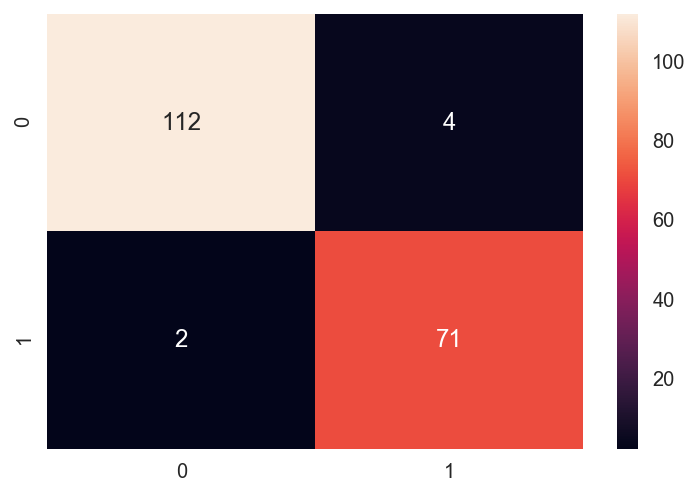

In [213]:
cm = confusion_matrix(y_test, rfc_all.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [220]:
print(classification_report(y_test, rfc_all.predict(x_test)))

             precision    recall  f1-score   support

          2       0.98      0.97      0.97       116
          4       0.95      0.97      0.96        73

avg / total       0.97      0.97      0.97       189



### Get feature importance

In [244]:
import numpy as np
importance = rfc_all.feature_importances_
indices = np.argsort(importance)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. %s (%.3f)" % (f + 1, x_train.columns[f], importance[indices[f]]))

Feature ranking:
1. Clump Thickness (0.258)
2. Uniformity of Cell Size (0.195)
3. Uniformity of Cell Shape (0.153)
4. Marginal Adhesion (0.125)
5. Single Epithelial Cell Size (0.106)
6. Bare Nuclei (0.088)
7. Bland Chromatin (0.038)
8. Normal Nucleoli (0.025)
9. Mitoses (0.012)


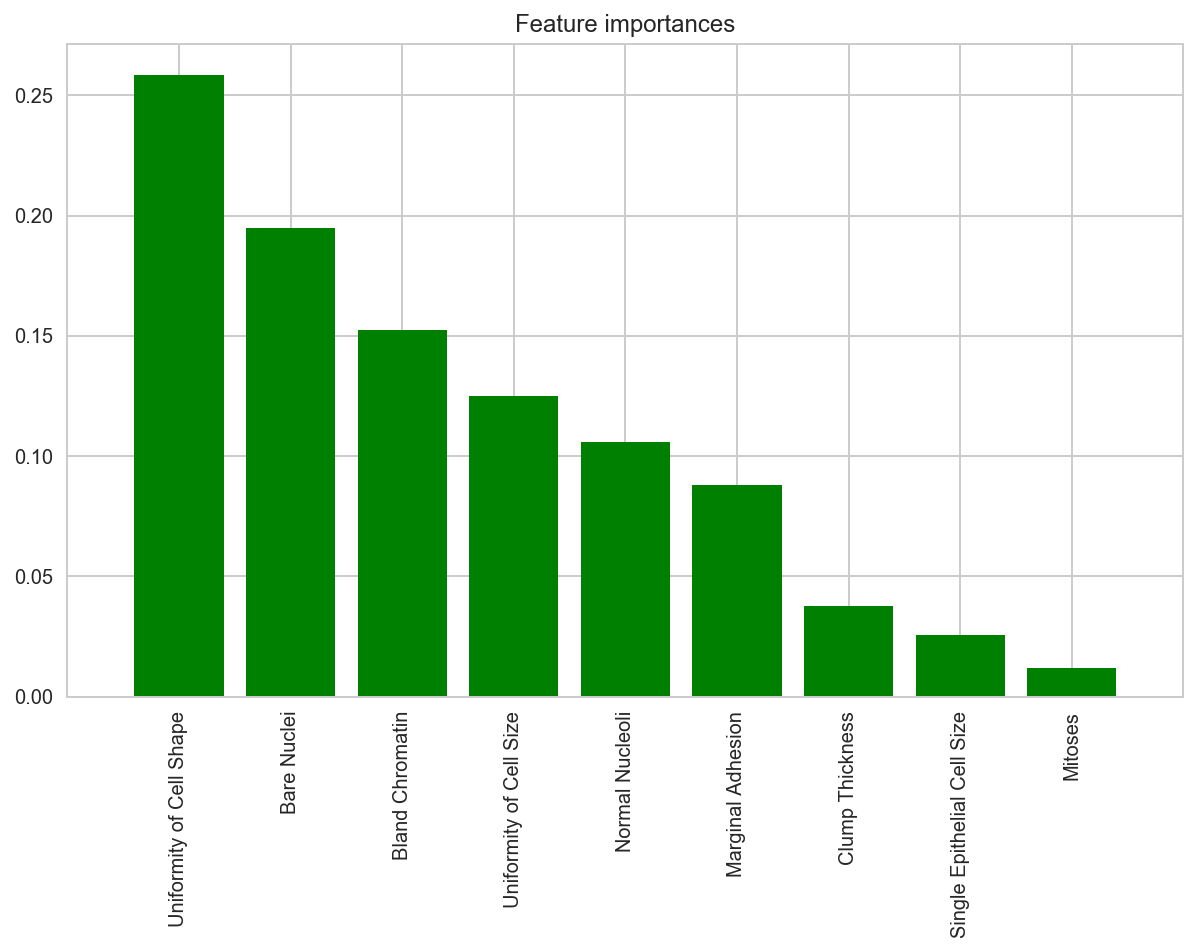

In [247]:
# plt the feature ranking
plt.figure(1, figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importance[indices],
       color="g", align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

### Try with only selected features

#### try the features that are less correlated

In [250]:
# try the features that are less correlated
x_1_train, x_1_test, y_1_train, y_1_test = train_test_split(x_1, y, test_size=0.3, random_state=2019)
rfc_sel = RandomForestClassifier(random_state=2019)
rfc_sel = rfc_sel.fit(x_1_train, y_1_train)
acc = accuracy_score(y_1_test, rfc_sel.predict(x_1_test))
acc

0.9312169312169312

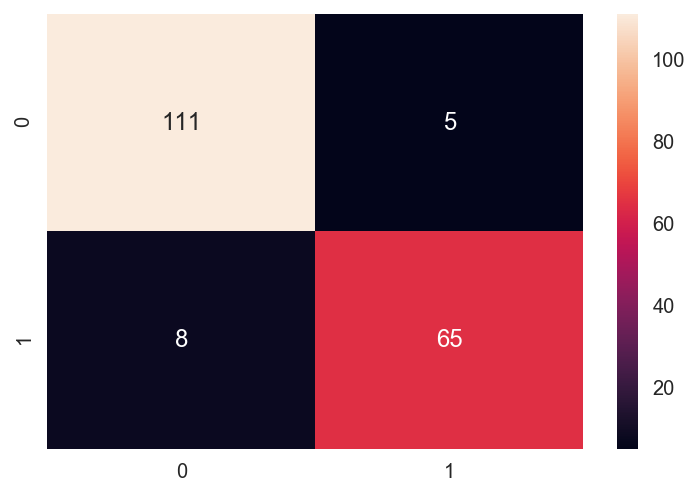

In [251]:
cm_1 = confusion_matrix(y_1_test, rfc_sel.predict(x_1_test))
sns.heatmap(cm_1,annot=True,fmt="d")

In [252]:
print(classification_report(y_1_test, rfc_sel.predict(x_1_test)))

             precision    recall  f1-score   support

          2       0.93      0.96      0.94       116
          4       0.93      0.89      0.91        73

avg / total       0.93      0.93      0.93       189



try only top important features

#### try top 6 features

In [255]:
drop_list2 = ['Mitoses', 'Single Epithelial Cell Size','Clump Thickness']
x_top = x.drop(drop_list2,axis = 1 )  # do not modify x, I will use it later 
x_top.head()

,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Bare Nuclei,Bland Chromatin,Normal Nucleoli
516,1,1,2,1.0,2,1
14,6,5,4,10.0,6,1
519,1,2,1,1.0,2,1
401,1,1,1,1.0,1,1
223,5,6,10,10.0,5,3


In [257]:
x_top_train, x_top_test, y_top_train, y_top_test = train_test_split(x_top, y, test_size=0.3, random_state=2019)
rfc_sel2 = RandomForestClassifier(random_state=2019)
rfc_sel2 = rfc_sel2.fit(x_top_train, y_top_train)
acc = accuracy_score(y_top_test, rfc_sel2.predict(x_top_test))
acc

0.9523809523809523

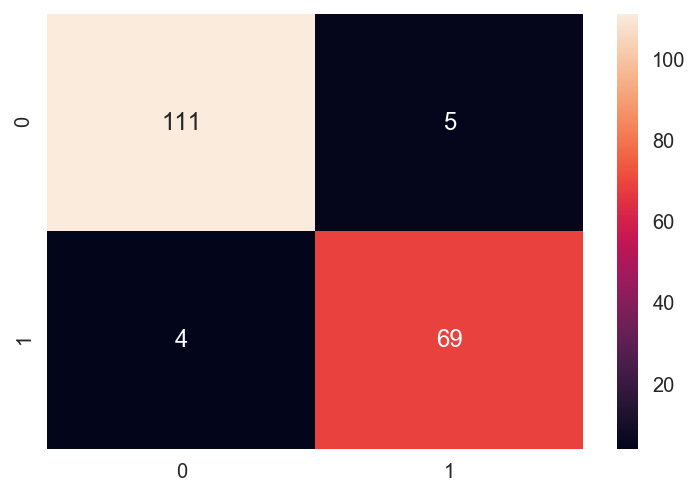

In [258]:
cm_2 = confusion_matrix(y_top_test, rfc_sel2.predict(x_top_test))
sns.heatmap(cm_2,annot=True,fmt="d")

In [259]:
print(classification_report(y_top_test, rfc_sel2.predict(x_top_test)))

             precision    recall  f1-score   support

          2       0.97      0.96      0.96       116
          4       0.93      0.95      0.94        73

avg / total       0.95      0.95      0.95       189



## Conclusion

In sum, I started from exploring the data and data visualization. Then I tried to use random forest to predict a cell is benign (not harmful) or malignant (cancerous) and showed the importance of features. Default data includes 8 feature with f1 score 0.97 but after feature selection I drop this number from 8 to 6 with f1 score 0.93 based on correlation; also I drop this number from 8 to 5 with f1 score 0.95 based on feature importance. I tried basic things, I am sure with feature engineering and classification methods, may ecxeed the 0.97 f1 score.